In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wup = lambda lcs_depth, d1_root, d2_root: lcs_depth / (d1_root + d2_root)
lch = lambda sp_len, d: -np.log(sp_len / (2 * d))
path = lambda sp_len: 1 / sp_len

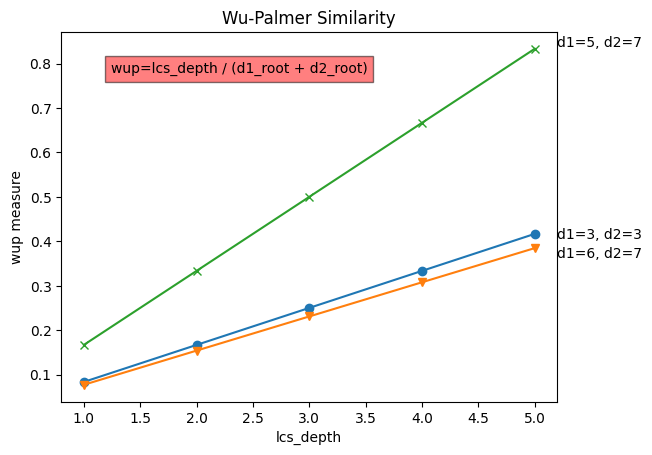

In [18]:
# In the wup similarity measure, a smaller lcs distance means that the two synsets are more similar,
# and this is divided by the sum of the distance of each synset to the root node.
# In this way, synsets in upper level of the hierarchy are penalized, because this sum will be lower and
# the measure itself, this perhaps is related to a less specialisation of the concepts.
# lower WUP value ==> higher similarity
d1_root, d2_root = [5, 6], 7

wup_measures_1 = [wup(x, d1_root[0], d2_root) for x in [1, 2, 3, 4, 5]]
wup_measures_2 = [wup(x, d1_root[1], d2_root) for x in [1, 2, 3, 4, 5]]
wup_measures_3 = [wup(x, 3, 3) for x in [1, 2, 3, 4, 5]]

fig, ax = plt.subplots()
ax.text(0.1, 0.9, 'wup=lcs_depth / (d1_root + d2_root)',
        horizontalalignment='left', verticalalignment='center',
        transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))
ax.plot([1, 2, 3, 4, 5], wup_measures_1, marker='o'), fig.text(0.9, 0.85, 'd1=5, d2=7')
ax.plot([1, 2, 3, 4, 5], wup_measures_2, marker='v'), fig.text(0.9, 0.41, 'd1=6, d2=7')
ax.plot([1, 2, 3, 4, 5], wup_measures_3, marker='x'), fig.text(0.9, 0.45, 'd1=3, d2=3')

ax.set(xlabel='lcs_depth', ylabel='wup measure', title='Wu-Palmer Similarity')

plt.savefig('wup_graphic.png', format='png', bbox_inches='tight')
plt.show()

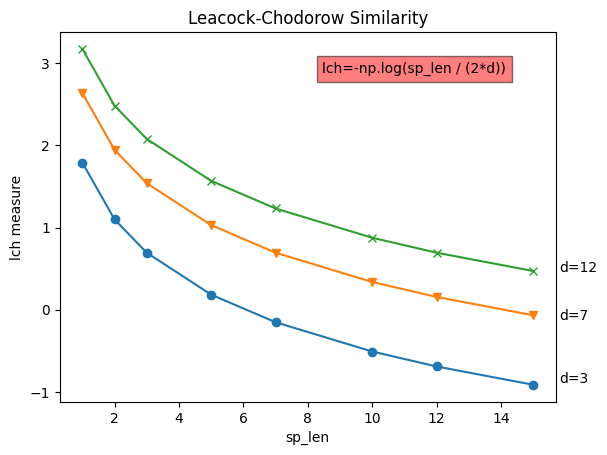

In [8]:
# In Leacock-Chodorow similarity, high value means high similarity. 
# With a lower shortest path length and a longer maximum taxonomy length, the result is higher.

d = [3, 7, 12]
sp_len = [1, 2, 3, 5, 7, 10, 12, 15]

lch_1 = [lch(x, d[0]) for x in sp_len]
lch_2 = [lch(x, d[1]) for x in sp_len]
lch_3 = [lch(x, d[2]) for x in sp_len]

fig, ax = plt.subplots()
ax.text(0.9, 0.9, 'lch=-np.log(sp_len / (2*d))',
        horizontalalignment='right', verticalalignment='center',
        transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))
ax.plot(sp_len, lch_1, marker='o')      , fig.text(0.905, 0.15, 'd=3')
ax.plot(sp_len, lch_2, marker='v')      , fig.text(0.905, 0.28, 'd=7')
ax.plot(sp_len, lch_3, marker='x')      , fig.text(0.905, 0.38, 'd=12')
ax.set(xlabel='sp_len', ylabel='lch measure', title='Leacock-Chodorow Similarity')

plt.savefig('lch_graphic.png', format='png')
plt.show()

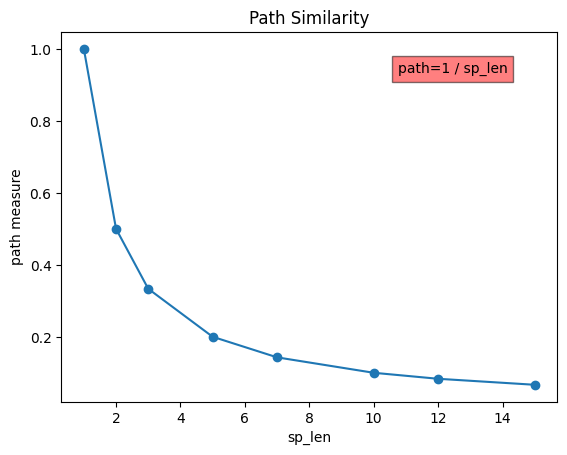

In [40]:
# In the Path similarity, a longer path between two synsets gives a smaller result, 
# so higher higher values means higher similairity.
 
sp_len = [1, 2, 3, 5, 7, 10, 12, 15]
path_measure = [path(x) for x in sp_len]

fig, ax = plt.subplots()
ax.text(0.9, 0.9, 'path=1 / sp_len',
        horizontalalignment='right', verticalalignment='center',
        transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))

ax.plot(sp_len,path_measure, marker='o')
ax.set(xlabel='sp_len', ylabel='path measure', title='Path Similarity')
plt.savefig('path_graphic.png', format='png')
plt.show()

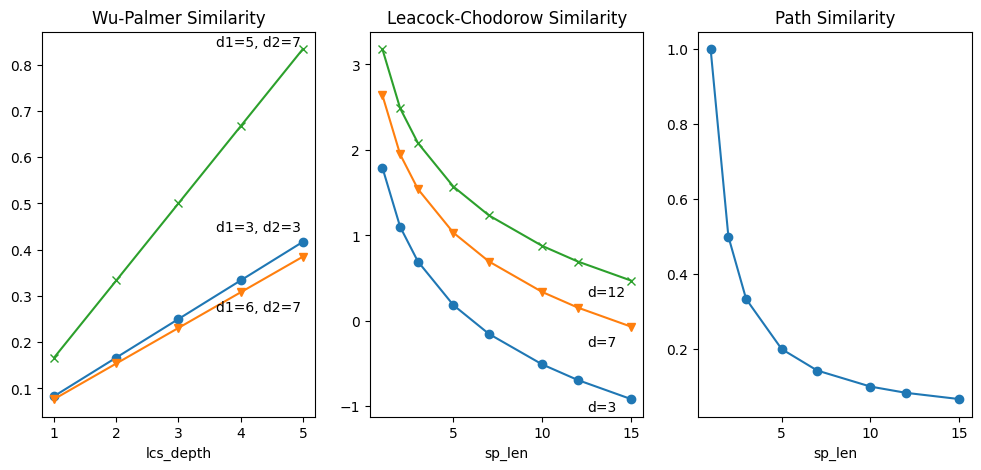

In [44]:
fig, ax = plt.subplots(1, 3)
### WUP
d1_root, d2_root = [5, 6], 7

wup_measures_1 = [wup(x, d1_root[0], d2_root) for x in [1, 2, 3, 4, 5]]
wup_measures_2 = [wup(x, d1_root[1], d2_root) for x in [1, 2, 3, 4, 5]]
wup_measures_3 = [wup(x, 3, 3) for x in [1, 2, 3, 4, 5]]

#ax[0].text(0.1, 0.9, 'wup=lcs_depth / (d1_root + d2_root)',
#        horizontalalignment='left', verticalalignment='center',
#        transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))
ax[0].plot([1, 2, 3, 4, 5], wup_measures_1, marker='o'), fig.text(0.27, 0.85, 'd1=5, d2=7')
ax[0].plot([1, 2, 3, 4, 5], wup_measures_2, marker='v'), fig.text(0.27, 0.32, 'd1=6, d2=7')
ax[0].plot([1, 2, 3, 4, 5], wup_measures_3, marker='x'), fig.text(0.27, 0.48, 'd1=3, d2=3')
ax[0].set(xlabel='lcs_depth', title='Wu-Palmer Similarity')

### LCH
d = [3, 7, 12]
sp_len = [1, 2, 3, 5, 7, 10, 12, 15]

lch_1 = [lch(x, d[0]) for x in sp_len]
lch_2 = [lch(x, d[1]) for x in sp_len]
lch_3 = [lch(x, d[2]) for x in sp_len]

#ax[1].text(0.9, 0.9, 'lch=-np.log(sp_len / (2*d))',
#        horizontalalignment='right', verticalalignment='center',
#        transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))
ax[1].plot(sp_len, lch_1, marker='o')      , fig.text(0.58, 0.12, 'd=3')
ax[1].plot(sp_len, lch_2, marker='v')      , fig.text(0.58, 0.25, 'd=7')
ax[1].plot(sp_len, lch_3, marker='x')      , fig.text(0.58, 0.35, 'd=12')
ax[1].set(xlabel='sp_len', title='Leacock-Chodorow Similarity')

### PATH
sp_len = [1, 2, 3, 5, 7, 10, 12, 15]
path_measure = [path(x) for x in sp_len]

#ax[2].text(0.9, 0.9, 'path=1 / sp_len',
#        horizontalalignment='right', verticalalignment='center',
#        transform=ax.transAxes, bbox=dict(facecolor='red', alpha=0.5))

ax[2].plot(sp_len,path_measure, marker='o')
ax[2].set(xlabel='sp_len', title='Path Similarity')

fig.set_size_inches(12, 5)
plt.savefig('img/graphics.png', format='png')
plt.show()